# Data Collection

In [5]:
# all the necessary import required in program are
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df =pd.read_excel('Participants_Data_News_category/Data_Train.xlsx')

df.sample(5)

,STORY,SECTION
5666,"Budding friendship or growing romance, what do...",2
796,The company has done a great job at making the...,3
5484,Samsung has hailed the folding design as the f...,1
511,Xiaomi on Monday made a similar announcement f...,1
4187,How did these districts vote in 2014? Parliame...,0


In [4]:
print(df['SECTION'].unique())
df.info()

[3 0 1 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


# EDA

1    36.339801
2    25.222863
0    22.102779
3    16.334557
Name: SECTION, dtype: float64


<Axes: xlabel='SECTION', ylabel='Percent'>

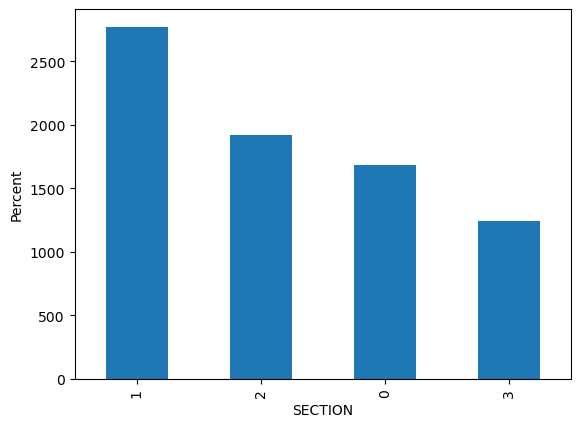

In [8]:
#PRESENTAGE DISTRIBUTION OF ALL DATA SET

print((df['SECTION'].value_counts()/df['SECTION'].count())*100)


sns.histplot(df['SECTION'].value_counts(),stat='percent')

df['SECTION'].value_counts().plot(kind='bar')

In [9]:
df.groupby('SECTION').describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1686   1673  This story has been published from a wire agen...    4
1        2772   2731  This story has been published from a wire agen...   13
2        1924   1914  The consensus reads, “Exciting, entertaining, ...    3
3        1246   1233  This story has been published from a wire agen...   11

# Text Preprocessing

#removing the punctuation

#removing the stopwords 

#removing the null values

#removing the numbers

#removing the html links tags

In [10]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [11]:
#function to perform all the basic text preprocessing

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

def text_pre_process(text):
    
    #removing the punctuation
    text=[char for char in text if char not in string.punctuation]
    text=''.join(text)
    
    #removing the number
    text =re.sub('[0-9]','',text)
    
    #removing the stopwords
    no_stop=[word for word in text.split() if word not in stopwords.words('english')]
    
    no_stop=' '.join(no_stop)
    
    #removing the emoji in the text
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    rem_emoji_text = emoji_pattern.sub(r'', no_stop)

    
    #doing the lemaatization
    lemmatizer=WordNetLemmatizer()
    
    #it will split the sentence into the words
    word_tokens = word_tokenize(rem_emoji_text)
    fin_txt =[lemmatizer.lemmatize(word) for word in word_tokens] 
    
    
    return fin_txt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Feature Engineering and Text Vectorization

<b>Genrate the custom column</b>
<ol>length of text</ol>
<ol>Total word</ol>


In [12]:
def add_create_custom_feature(df):
    
    #length of text
    df['length_text'] = df['STORY'].apply(len)
    
    df['word_length'] = df['STORY'].apply(lambda row:len(row.split(' ')) if not pd.isnull(row) else 0)
    
    return df

In [13]:
add_create_custom_feature(df)

,STORY,SECTION,length_text,word_length
0,But the most painful was the huge reversal in ...,3,843,146
1,How formidable is the opposition alliance amon...,0,129,17
2,Most Asian currencies were trading lower today...,3,386,57
3,"If you want to answer any question, click on ‘...",1,587,101
4,"In global markets, gold prices edged up today ...",3,299,46
...,...,...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0,394,62
7624,"The film, which also features Janhvi Kapoor, w...",2,136,24
7625,The database has been created after bringing t...,1,484,74
7626,"The state, which has had an uneasy relationshi...",0,1927,306


In [14]:
df.head()

,STORY,SECTION,length_text,word_length
0,But the most painful was the huge reversal in ...,3,843,146
1,How formidable is the opposition alliance amon...,0,129,17
2,Most Asian currencies were trading lower today...,3,386,57
3,"If you want to answer any question, click on ‘...",1,587,101
4,"In global markets, gold prices edged up today ...",3,299,46


<Axes: xlabel='length_text', ylabel='Percent'>

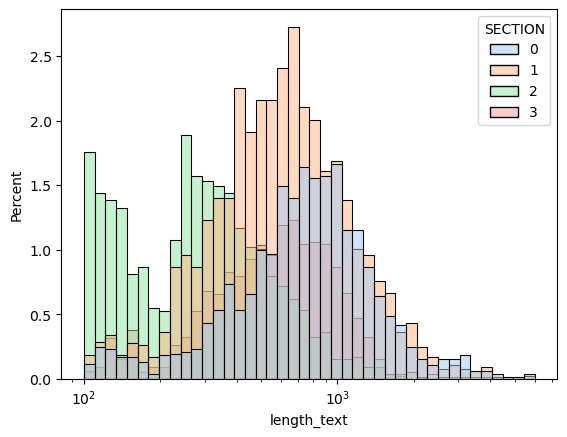

In [15]:
#EDA to check the custom column will help or not in 

sns.histplot(data=df,x=df['length_text'],hue=df['SECTION'],stat='percent',palette='pastel',log_scale=True)

In [18]:
#now creating the word vectorizer algorithm to work
#DOING THE bag of words vectorization
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=text_pre_process).fit(df['STORY'])
bow_transformer

CountVectorizer(analyzer=<function text_pre_process at 0x0000027948AF3100>)

In [19]:
print(len(bow_transformer.vocabulary_))

bow_transformer.vocabulary_

37474


{'But': 2243,
 'painful': 29393,
 'huge': 25191,
 'reversal': 31987,
 'fee': 23306,
 'income': 25596,
 'unheard': 36027,
 'among': 16977,
 'private': 30573,
 'sector': 32658,
 'lender': 26800,
 'Essentially': 4544,
 'mean': 27525,
 'Yes': 16135,
 'Bank': 1482,
 'took': 35326,
 'granted': 24420,
 'structured': 34280,
 'loan': 27010,
 'deal': 20856,
 'paid': 29388,
 'accounted': 16438,
 'upfront': 36235,
 'book': 18386,
 'As': 993,
 'borrower': 18427,
 'turned': 35717,
 'defaulter': 20985,
 'tied': 35204,
 'fell': 23319,
 'crack': 20427,
 'Gill': 5443,
 'vowed': 36684,
 'shift': 32974,
 'safer': 32317,
 'accounting': 16439,
 'practice': 30282,
 'amortizing': 16985,
 'rather': 31148,
 'booking': 18388,
 '’': 37454,
 's': 32286,
 'move': 28132,
 'mend': 27617,
 'past': 29540,
 'way': 36827,
 'nasty': 28330,
 'surprise': 34555,
 'future': 24032,
 'This': 14573,
 'good': 24335,
 'news': 28481,
 'considering': 20049,
 'investor': 26162,
 'love': 27144,
 'clean': 19436,
 'image': 25416,
 'loat

In [20]:
#NOW TRANSFORMING THE WHOLE TEXT DOCUMNET INTO THE VECTOR FORM
bag_cor=bow_transformer.transform(df['STORY'])

print('Shape of Sparse Matrix: ', bag_cor.shape)
print('Amount of Non-Zero occurences: ', bag_cor.nnz)

Shape of Sparse Matrix:  (7628, 37474)
Amount of Non-Zero occurences:  421261


In [21]:
#optimizing the Bag of Words with TFIDF technique
#TF -IDF transsformer

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bag_cor)
tfidf_transformeridf_transformer

In [22]:
#now transforming the whole BAg of words corpus into the tfidf transforme
story_tfidf = tfidf_transformer.transform(bag_cor)

story_tfidf.shape

(7628, 37474)

# Training a Model

In [23]:
df.sample(4)

,STORY,SECTION,length_text,word_length
70,"In the early 1960s, Ray recommended Ritwik Gha...",2,1167,198
4257,“We must eat humble pie today and admit we und...,3,1410,234
21,"Starring Varun Dhawan, Alia Bhatt, Sonakshi Si...",2,572,98
3266,They found that consumers who are highly depen...,1,576,87


In [25]:

from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split


# story_tfidf is your TF-IDF matrix and custom_feature is your custom feature matrix
custom_feature = df.iloc[:, 2:]

# Convert custom_feature to a sparse matrix because storyidf in the sparse matrix
custom_feature_sparse = csr_matrix(custom_feature)

#combing the custom feature and tfidf feature

combined_feature=hstack([story_tfidf,custom_feature_sparse])

y=df['SECTION']

X_train, X_test, y_train, y_test = train_test_split(combined_feature, y, test_size=0.3, random_state=42)


In [26]:
X_train.shape

(5339, 37476)

In [27]:
# ENSEMBLE ALGORITHM
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [28]:
predict = xgb_model.predict(X_test)

#score of suppport vector  Classifier model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(accuracy_score(y_test,predict))

print(classification_report(y_test,predict))

print(confusion_matrix(y_test,predict))

0.9436435124508519
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       491
           1       0.95      0.95      0.95       846
           2       0.94      0.96      0.95       598
           3       0.92      0.93      0.92       354

    accuracy                           0.94      2289
   macro avg       0.94      0.94      0.94      2289
weighted avg       0.94      0.94      0.94      2289

[[452  20  11   8]
 [  5 802  19  20]
 [  8  12 576   2]
 [  4  12   8 330]]


In [29]:
#now predictiong another test file data for submission
test_data =pd.read_excel('Participants_Data_News_category/Data_Test.xlsx')

In [33]:
add_create_custom_feature(test_data)

,STORY,length_text,word_length
0,2019 will see gadgets like gaming smartphones ...,1558,231
1,It has also unleashed a wave of changes in the...,250,45
2,It can be confusing to pick the right smartpho...,1602,264
3,The mobile application is integrated with a da...,813,131
4,We have rounded up some of the gadgets that sh...,1263,217
...,...,...,...
2743,"According to researchers, fraud in the mobile ...",511,80
2744,The iPhone XS and XS Max share the Apple A12 c...,714,128
2745,"On the photography front, the Note 5 Pro featu...",348,63
2746,UDAY mandated that discoms bring the gap betwe...,1246,191


In [34]:
tst = xgb_model.predict(test_data)

ValueError: Feature shape mismatch, expected: 37476, got 3

0       2019 will see gadgets like gaming smartphones ...
1       It has also unleashed a wave of changes in the...
2       It can be confusing to pick the right smartpho...
3       The mobile application is integrated with a da...
4       We have rounded up some of the gadgets that sh...
                              ...                        
2743    According to researchers, fraud in the mobile ...
2744    The iPhone XS and XS Max share the Apple A12 c...
2745    On the photography front, the Note 5 Pro featu...
2746    UDAY mandated that discoms bring the gap betwe...
2747    Ripple also helps bank customers send money to...
Name: STORY, Length: 2748, dtype: object

In [44]:
test_bag_cor=bow_transformer.transform(test_data['STORY'])#applying Bag of words in test data 

test_tfidf = tfidf_transformer.transform(test_bag_cor) #transform bag of words data to tfidf


custom_feature_test = test_data.iloc[:, 1:]

# Convert custom_feature to a sparse matrix because storyidf in the sparse matrix
custom_feature_sparse = csr_matrix(custom_feature_test)

combine_test_data=hstack([test_tfidf,custom_feature_sparse])

tst = xgb_model.predict(combine_test_data)



In [48]:
df_test = pd.DataFrame(tst)

# Save the DataFrame to an Excel file
df_test.to_excel('test_predict_data.xlsx', index=False)

In [39]:
combine_test_data.shape

(2748, 37475)

In [43]:
custom_feature_test

,word_length
0,231
1,45
2,264
3,131
4,217
...,...
2743,80
2744,128
2745,63
2746,191
